In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

os.environ['PATH'] = r'/farmdisk1/cosmology/Libraries/texlive/2024/bin/x86_64-linux' #+ os.environ['PATH']
# Enable LaTeX in Matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', serif='Computer Modern Roman')
mpl.rcParams['text.latex.preamble'] = r'''
    \usepackage{amsmath}  % Se necessario
    \newcommand{\sfont}[1]{{\scriptscriptstyle\rm #1}}  % Definizione di \sfont
'''

In [3]:
# Number of samples
N = 10000

/tmp/ipykernel_2005942/2249824537.py:9: RuntimeWarning: divide by zero encountered in log
  return -np.log(1 - u)


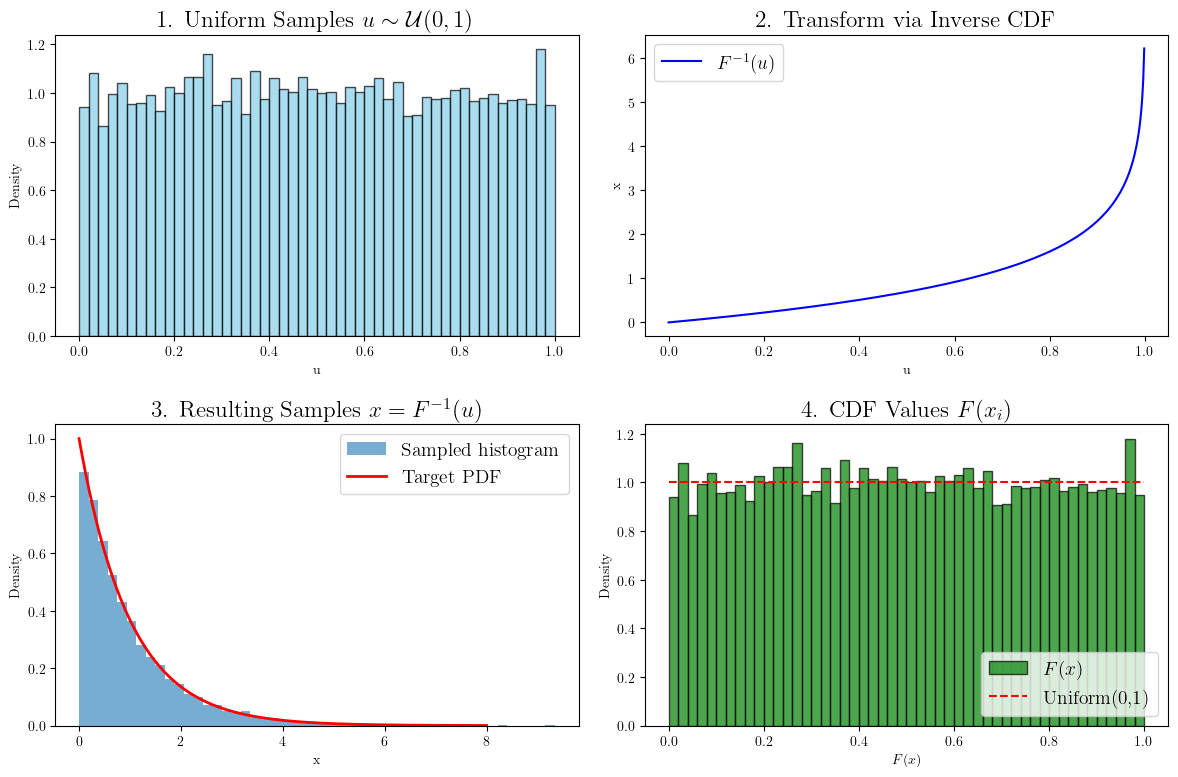

In [4]:
# PDF and CDF of the target distribution: Exponential(λ=1)
def pdf(x):
    return np.exp(-x) * (x >= 0)

def cdf(x):
    return 1 - np.exp(-x) * (x >= 0)

def inverse_cdf(u):
    return -np.log(1 - u)

# Step 1: Generate uniform samples
u = np.random.uniform(0, 1, N)

# Step 2: Apply inverse CDF
samples = inverse_cdf(u)

# Step 3: Evaluate CDF at samples
cdf_values = cdf(samples)

# Plotting in algorithmic order
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

plt.rcParams.update({'font.size': 14, 'axes.labelsize': 14, 'xtick.labelsize': 13, 'ytick.labelsize': 13})

ax = ax.flatten()

# 1. Uniform samples
ax[0].hist(u, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='k')
ax[0].set_title("1. Uniform Samples $u \sim \mathcal{U}(0,1)$")
ax[0].set_xlabel("u")
ax[0].set_ylabel("Density")

# 2. Inverse CDF transformation
x_plot = np.linspace(0, 1, 500)
ax[1].plot(x_plot, inverse_cdf(x_plot), 'b', label=r'$F^{-1}(u)$')
ax[1].set_title("2. Transform via Inverse CDF")
ax[1].set_xlabel("u")
ax[1].set_ylabel("x")
ax[1].legend(loc='upper left')


# 3. Histogram of resulting samples
x_vals = np.linspace(0, 8, 1000)
ax[2].hist(samples, bins=50, density=True, alpha=0.6, label="Sampled histogram")
ax[2].plot(x_vals, pdf(x_vals), 'r-', lw=2, label="Target PDF")
ax[2].set_title("3. Resulting Samples $x = F^{-1}(u)$")
ax[2].set_xlabel("x")
ax[2].set_ylabel("Density")
ax[2].legend(loc='upper right')


# 4. Evaluated CDF of the samples
ax[3].hist(cdf_values, bins=50, density=True, alpha=0.7, color='green', edgecolor='k', label=r"$F(x)$")
ax[3].hlines(1, 0, 1, colors='red', linestyles='--', label='Uniform(0,1)')
ax[3].set_title("4. CDF Values $F(x_i)$")
ax[3].set_xlabel(r"$F(x)$")
ax[3].set_ylabel("Density")
ax[3].legend(loc='lower right')


plt.tight_layout()
plt.show()


appendix A

Effective number of Gaussian sigmas: 1.50


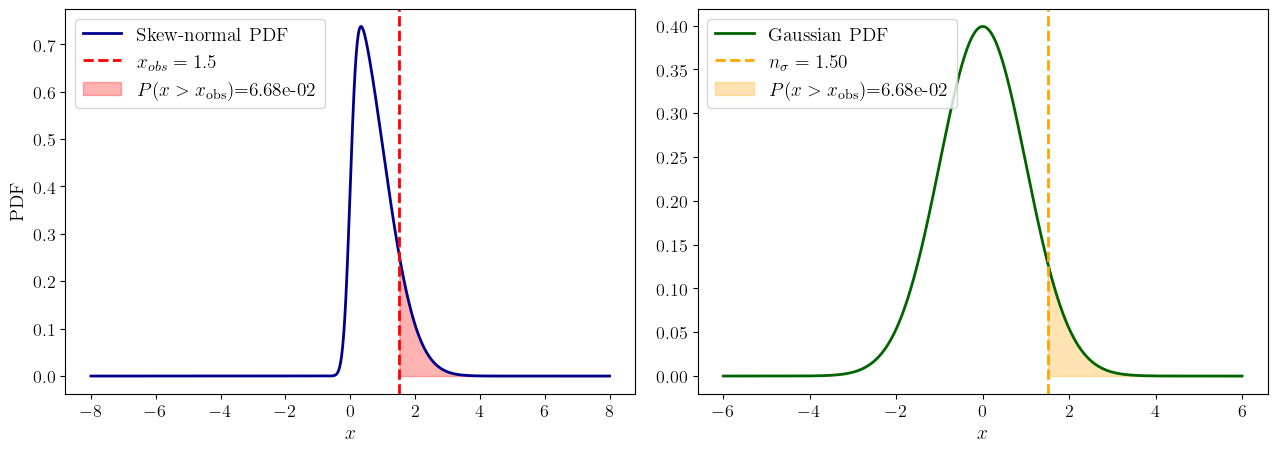

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm, chi2, norm, exponnorm
from scipy.special import erfinv

# Parameters
a = 6  # skewness parameter for skew-normal
dof = 1  # degrees of freedom for chi2
x_skew = np.linspace(-8, 8, 1000)
x_chi2 = np.linspace(0, 8, 1000)
x_gauss = np.linspace(-6, 6, 1000)

# PDFs
pdf_skew = skewnorm.pdf(x_skew, a)
pdf_chi2 = chi2.pdf(x_chi2, dof)
pdf_gauss = norm.pdf(x_gauss)

# Observed event in skewed distribution
x_obs_skew = 1.5
tail_prob_skew = 1 - norm.cdf(x_obs_skew) #skewnorm.cdf(x_obs_skew, a)

# Compute effective number of Gaussian sigmas for the skewed distribution
n_sigma = np.sqrt(2) * erfinv(1-2*tail_prob_skew)
print(f"Effective number of Gaussian sigmas: {n_sigma:.2f}")


# Find equivalent chi2 value from tail_prob_skew (inverse survival function)
x_obs_chi2 = chi2.isf(tail_prob_skew, dof)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey=False)

# Left: Skewed distribution
axes[0].plot(x_skew, pdf_skew, color='darkblue', lw=2, label='Skew-normal PDF')
axes[0].axvline(x_obs_skew, color='red', linestyle='--', lw=2, label=f'$x_{{obs}}={x_obs_skew}$')
axes[0].fill_between(x_skew[x_skew >= x_obs_skew], 0, pdf_skew[x_skew >= x_obs_skew], color='red', alpha=0.3,
                     label=r'$P(x>x_\mathrm{obs}$)='+f'{tail_prob_skew:.2e}')
#axes[0].set_title('Skewed Distribution')
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('PDF')
axes[0].legend()

'''# Middle: Chi-squared distribution
axes[1].plot(x_chi2, pdf_chi2, color='purple', lw=2, label=r'$\chi^2 (d=$'+f'{dof}'+r'$)$')
axes[1].axvline(x_obs_chi2, color='magenta', linestyle='--', lw=2,
                label=r'$\Delta\chi^2_\mathrm{obs} = $'+f'{x_obs_chi2:.2f}')
axes[1].fill_between(x_chi2[x_chi2 >= x_obs_chi2], 0, pdf_chi2[x_chi2 >= x_obs_chi2], color='magenta', alpha=0.3,
                    label=f'$P(\\Delta\\chi^2>\\Delta\\chi^2_\\mathrm{{obs}})$='+f'{tail_prob_skew:.2e}')
#axes[1].set_title('Chi-squared Distribution')
axes[1].set_xlabel('$\\Delta\\chi^2$')
axes[1].legend(loc='upper right')'''

# Right: Equivalent Gaussian
axes[1].plot(x_gauss, pdf_gauss, color='darkgreen', lw=2, label='Gaussian PDF')
axes[1].axvline(n_sigma, color='orange', linestyle='--', lw=2, label=f'$n_\\sigma={n_sigma:.2f}$')
axes[1].fill_between(x_gauss[x_gauss >= n_sigma], 0, pdf_gauss[x_gauss >= n_sigma], color='orange', alpha=0.3,
                    label=r'$P(x>x_\mathrm{obs}$)='+f'{tail_prob_skew:.2e}')
#axes[2].set_title('Equivalent Gaussian')
axes[1].set_xlabel('$x$')
axes[1].legend(loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('plots/skewed_distribution_effective_sigmas.pdf', dpi=300, bbox_inches='tight')
plt.show()


1D Confidence levels (1, 2, 3 sigma): [0.68268949 0.95449974 0.9973002 ]
Chi2 levels for 1, 2, 3 sigma, ndof = 2: [ 2.29574893  6.18007431 11.82915808]


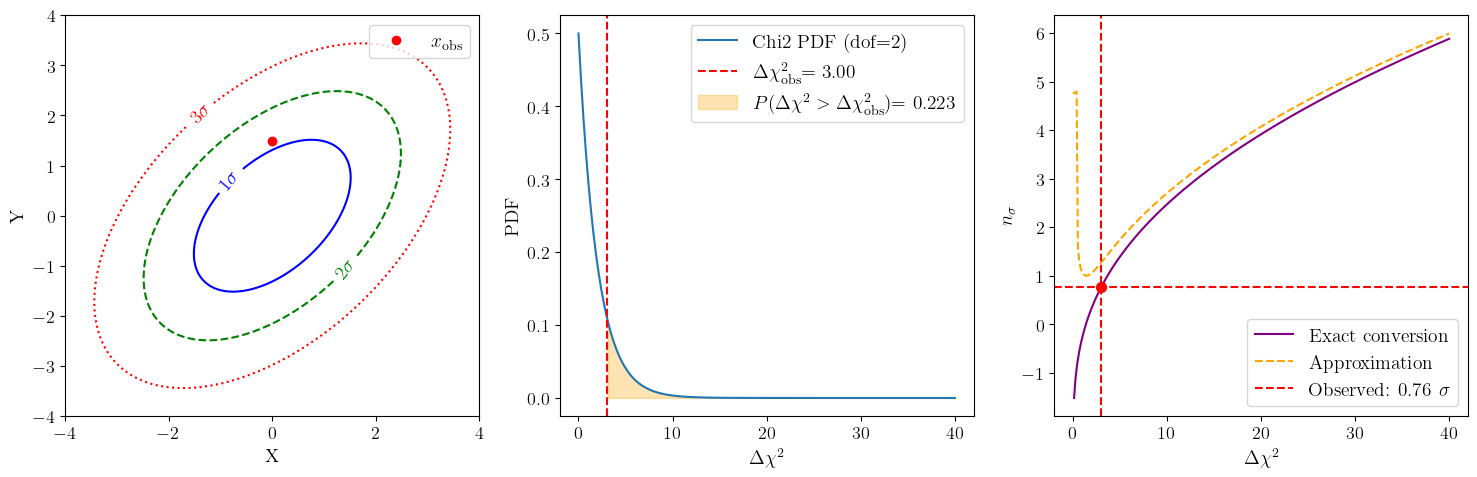

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, chi2
from scipy.special import erfinv, gamma

# Parametri
mu = np.array([0, 0])
cov = np.array([[1, 0.5],
                [0.5, 1]])
inv_cov = np.linalg.inv(cov)

# Griglia
x = np.linspace(-4, 4, 200)
y = np.linspace(-4, 4, 200)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# PDF gaussiana 2D
rv = multivariate_normal(mu, cov)
pdf = rv.pdf(pos)

# Calcolo Mahalanobis distanza al quadrato su tutta la griglia
diff = pos - mu
mahal_sq = np.einsum('...i,ij,...j->...', diff, inv_cov, diff)

# Livelli di confidenza per 1, 2, 3 sigma
dof = 2
conf_levels = 2*norm.cdf(np.array([1, 2, 3]))-1
print("1D Confidence levels (1, 2, 3 sigma):", conf_levels)
levels = chi2.ppf(conf_levels, dof)
print(f"Chi2 levels for 1, 2, 3 sigma, ndof = {dof}:", levels)

# Valore osservato (esempio)
x_obs = np.array([0,1.5])
mahal_sq_obs = (x_obs - mu).T @ inv_cov @ (x_obs - mu)

# Probabilità di coda per il valore osservato
tail_prob = 1 - chi2.cdf(mahal_sq_obs, dof)

# Funzione per convertire chi2 value in n_sigma gaussiani equivalenti (one-sided)
def chi2_to_sigma(chi2_val, dof):
    tail_p = 1 - chi2.cdf(chi2_val, dof)
    # Numero di sigma corrispondente a prob di coda one-sided
    n_sigma = np.sqrt(2) * erfinv(1 - 2 * tail_p)
    return n_sigma

# Funzione approssimata per n_sigma
def approx_sigma(x, d):
    # Per evitare problemi numerici in x=0 o valori troppo bassi, mettiamo un floor
    x_safe = np.maximum(x, 1e-12)
    term1 = 2**(d/2) * gamma(d/2)
    numerator = term1
    denominator = (x_safe + d - 2) * x_safe**((d-4)/2)
    alpha = 2 * np.log(numerator / denominator)
    inside_log = x_safe + alpha - np.log(2*np.pi)
    # Siccome inside_log deve essere positivo, mettiamo floor
    inside_log_safe = np.maximum(inside_log, 1e-10)
    nsigma = np.sqrt(x_safe + alpha - np.log(2*np.pi * inside_log_safe))
    return nsigma

# Array x per il terzo pannello
chi2_vals = np.linspace(0, 40, 300)
sigma_vals = chi2_to_sigma(chi2_vals, dof)

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Pannello 1: Contorni 1,2,3 sigma + $x_\mathrm{obs}$
cs = axs[0].contour(X, Y, mahal_sq, levels=levels, colors=['blue', 'green', 'red'],
                    linestyles=['solid', 'dashed', 'dotted'])
axs[0].clabel(cs, fmt={level: f'${i}\\sigma$' for i, level in enumerate(levels, start=1)})
axs[0].plot(x_obs[0], x_obs[1], 'ro', label='$x_\mathrm{obs}$')
#axs[0].set_title('2D PDF')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].legend()

# Pannello 2: Distribuzione chi2 + linea osservata
pdf_chi2 = chi2.pdf(chi2_vals, dof)
axs[1].plot(chi2_vals, pdf_chi2, label=f'Chi2 PDF (dof={dof})')
axs[1].axvline(mahal_sq_obs, color='red', linestyle='--',\
               label=r'$\Delta\chi^2_\mathrm{obs}$'+f'= {mahal_sq_obs:.2f}')
axs[1].fill_between(chi2_vals, 0, pdf_chi2, where=(chi2_vals >= mahal_sq_obs), color='orange', alpha=0.3,
                    label=r'$P(\Delta\chi^2>\Delta\chi^2_\mathrm{obs})$'+f'= {tail_prob:.3f}')
#axs[1].set_title('Chi2')
axs[1].set_xlabel(r'$\Delta \chi^2$')
axs[1].set_ylabel('PDF')
axs[1].legend()

# Pannello 3: Conversione chi2 -> sigma gaussiani
axs[2].plot(chi2_vals, sigma_vals, color='purple', label='Exact conversion')
axs[2].plot(chi2_vals, approx_sigma(chi2_vals, dof), color='orange', linestyle='--', label='Approximation')
axs[2].axvline(mahal_sq_obs, color='red', linestyle='--')
axs[2].axhline(chi2_to_sigma(mahal_sq_obs, dof), color='red', linestyle='--',
               label=f'Observed: {chi2_to_sigma(mahal_sq_obs, dof):.2f} $\\sigma$')
axs[2].scatter(mahal_sq_obs, chi2_to_sigma(mahal_sq_obs, dof), color='red', s=50, zorder=5)
#axs[2].set_title(r'$\Delta \chi^2 \to n_\sigma$ ')
axs[2].set_xlabel(r'$\Delta \chi^2$')
axs[2].set_ylabel(r'$n_\sigma$')
axs[2].legend()


plt.tight_layout()
plt.show()



single tail test

In [30]:
def chi2_to_sigma(chi2_val, dof):
    tail_p = 1-chi2.cdf(chi2_val, dof)
    # Numero di sigma corrispondente a prob di coda one-sided
    n_sigma = np.sqrt(2) * erfinv(1-tail_p)
    return n_sigma

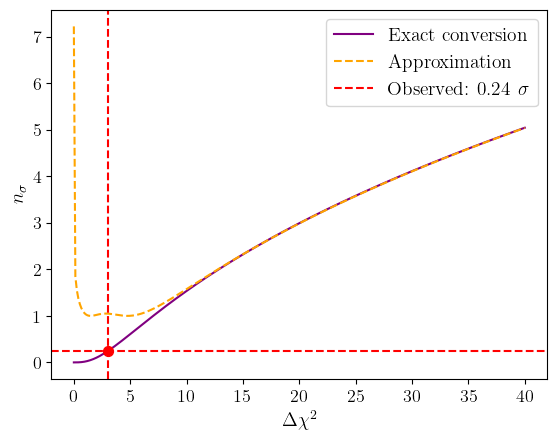

In [31]:
# Pannello 3: Conversione chi2 -> sigma gaussiani
chi2_vals = np.linspace(0, 40, 300)
dof = 6  # degrees of freedom for chi2

plt.plot(chi2_vals, chi2_to_sigma(chi2_vals, dof), color='purple', label='Exact conversion')
plt.plot(chi2_vals, approx_sigma(chi2_vals, dof), color='orange', linestyle='--', label='Approximation')
plt.axvline(mahal_sq_obs, color='red', linestyle='--')
plt.axhline(chi2_to_sigma(mahal_sq_obs, dof), color='red', linestyle='--',
               label=f'Observed: {chi2_to_sigma(mahal_sq_obs, dof):.2f} $\\sigma$')
plt.scatter(mahal_sq_obs, chi2_to_sigma(mahal_sq_obs, dof), color='red', s=50, zorder=5)
#axs[2].set_title(r'$\Delta \chi^2 \to n_\sigma$ ')
plt.xlabel(r'$\Delta \chi^2$')
plt.ylabel(r'$n_\sigma$')
plt.legend()